# Feature Engineering & Tests

This notebook explores feature engineering techniques and their impact on model performance for crop and irrigation prediction tasks.

## Table of Contents
1. Import Required Libraries
2. Load Datasets
3. Feature Selection
4. Feature Transformation
5. Feature Creation
6. Feature Scaling
7. Feature Importance Analysis
8. Feature Engineering Experiments
9. Model Performance Comparison
10. Insights & Recommendations
---

## 1. Import Required Libraries

In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 2. Load Datasets

In [10]:
# Load crop and irrigation datasets
crop_data = pd.read_csv('../data/crop_data.csv')
irrigation_data = pd.read_csv('../data/Final_irregation_optimization_data.csv')

print('Crop Data Shape:', crop_data.shape)
print('Irrigation Data Shape:', irrigation_data.shape)

Crop Data Shape: (2200, 8)
Irrigation Data Shape: (100000, 35)


## 3. Feature Selection

In [11]:
# SelectKBest for crop_data (classification)
if 'label' in crop_data.columns:
    X_crop = crop_data.drop('label', axis=1)
    y_crop = crop_data['label']
elif 'Crop' in crop_data.columns:
    X_crop = crop_data.drop('Crop', axis=1)
    y_crop = crop_data['Crop']
else:
    X_crop = crop_data.iloc[:,:-1]
    y_crop = crop_data.iloc[:,-1]

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_crop.select_dtypes(include=np.number), y_crop)
selected_features = X_crop.select_dtypes(include=np.number).columns[selector.get_support()]
print('Top 5 Crop Features:', list(selected_features))

Top 5 Crop Features: ['N', 'P', 'K', 'humidity', 'rainfall']


## 4. Feature Transformation

In [12]:
# Log transform skewed features
skewed_cols = [col for col in X_crop.select_dtypes(include=np.number).columns if abs(X_crop[col].skew()) > 1]
for col in skewed_cols:
    X_crop[col + '_log'] = np.log1p(X_crop[col])
print('Log-transformed columns:', skewed_cols)

Log-transformed columns: ['P', 'K', 'humidity']


## 5. Feature Creation

In [13]:
# Create interaction features
if len(selected_features) >= 2:
    X_crop['interaction_1_2'] = X_crop[selected_features[0]] * X_crop[selected_features[1]]
    print('Created interaction feature between', selected_features[0], 'and', selected_features[1])

Created interaction feature between N and P


## 6. Feature Scaling

In [14]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_crop.select_dtypes(include=np.number))
print('Scaled feature sample:', X_scaled[:5])

Scaled feature sample: [[ 1.0687974  -0.34455075 -0.1016875  -0.93558693  0.47266646  0.04330173
   1.8103605  -0.03730209  0.28535367  0.47630885  0.67179795]
 [ 0.93332887  0.14061552 -0.14118477 -0.75964603  0.39705125  0.73487256
   2.24205791  0.4152748   0.22101782  0.43001842  1.23813461]
 [ 0.25598625  0.04964684 -0.08193887 -0.51589814  0.48695381  1.77151047
   2.92106603  0.34061378  0.31643299  0.48494981  0.43541395]
 [ 0.63529812 -0.55681099 -0.1609334   0.17280704  0.38980549  0.66030768
   2.53704803 -0.29150666  0.1876916   0.42553249  0.08576262]
 [ 0.74367294 -0.34455075 -0.12143613 -1.08364706  0.45479163  1.49786778
   2.89837267 -0.03730209  0.25355983  0.46545144  0.42359475]]


## 7. Feature Importance Analysis

Feature Importances:
rainfall           0.186803
humidity           0.133913
humidity_log       0.126088
K_log              0.102799
K                  0.088353
P                  0.083691
N                  0.083043
P_log              0.075365
interaction_1_2    0.050345
temperature        0.046626
ph                 0.022974
dtype: float64


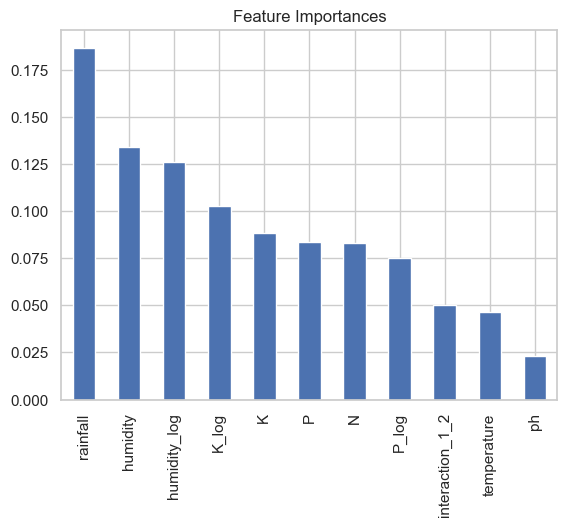

In [15]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_crop)
importances = rf.feature_importances_
feat_names = X_crop.select_dtypes(include=np.number).columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print('Feature Importances:')
print(feat_imp)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.show()

## 8. Feature Engineering Experiments

In [16]:
# Compare model performance with engineered features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_crop, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy with Engineered Features:', acc)

Random Forest Accuracy with Engineered Features: 0.9931818181818182


## 9. Model Performance Comparison

Compare accuracy and other metrics for models trained with original vs engineered features. Document results and visualize performance differences.

## 10. Insights & Recommendations

- Document which feature engineering techniques improved model performance.
- Summarize best practices for feature engineering in crop and irrigation prediction tasks.
- Suggest next steps for further improvement.